# PROCESADO DE LOS DATOS

# 1. Librerías

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder

import os

import warnings
warnings.filterwarnings('ignore')

In [195]:
df_cars = pd.read_csv('Datos_web_scraping/df_cars_07-06-24_13h03m26s.csv', sep=',')

In [196]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fabricante   9342 non-null   object
 1   Descripción  9342 non-null   object
 2   Datos        9342 non-null   object
 3   Precio_£     9342 non-null   object
 4   Ciudad       9340 non-null   object
dtypes: object(5)
memory usage: 365.1+ KB


In [197]:
df_cars.head()

,Fabricante,Descripción,Datos,Precio_£,Ciudad
0,Kia Rio,1.4L DOMINO 5d AUTO 96 BHP,"69,474 miles\n2011 reg\nAutomatic\nPetrol","£3,250",Watford
1,Ford Focus,1.6L ZETEC NAVIGATOR TDCI 5d 113 BHP,"84,586 miles\n2014 reg\nManual\nDiesel","£4,650",Watford
2,Hyundai i30,1.4 S 5d 99 BHP,"98,898 miles\n2015 reg\nManual\nPetrol","£4,700",Peterborough
3,SEAT Ibiza,1.0 E 3d 74 BHP,"71,056 miles\n2015 reg\nManual\nPetrol","£4,700",Peterborough
4,Citroen C1,1.0 VTi Furio (68 ps),"56,340 miles\n2017 reg\nManual\nPetrol","£4,962",Nationwide delivery available


# 2. Extracción de información de la columna Datos

La columna **Datos** tiene información que se puede extraer para construir columnas con el kilometraje, el año de fabricación, el tipo de transmisión y el tipo de combustible.

In [198]:

resumen_datos = []


for n in df_cars['Datos']:
    resumen_datos.append(n.split('\n'))

In [199]:

opciones_transmision = ['Manual', 'Automatic']
opciones_tipo_combustible = ['Petrol', 'Diesel', 'Electric', 'Hybrid', 'Plug-in hybrid', 'Petrol & LPG']


transmision = []

tipo_combustible = []



for i,n in enumerate(resumen_datos):
    for j,t in enumerate(opciones_transmision):
        if t in resumen_datos[i]:
            transmision.append(t)
            break
        else:
            if j != len(opciones_transmision)-1:
                continue
            else:
                transmision.append('NA')
                
                
for i,n in enumerate(resumen_datos):
    for j,c in enumerate(opciones_tipo_combustible):
        if c in resumen_datos[i]:
            tipo_combustible.append(c)
            break
        else:
            if j != (len(opciones_tipo_combustible)-1):
                continue
            else:
                tipo_combustible.append('NA')                
                
                
                

In [200]:
kilometraje = [n[0] for n in resumen_datos]
año = [n[1] for n in resumen_datos]

In [201]:
df_cars['Kilometraje_millas'] = kilometraje
df_cars['Año'] = año
df_cars['Transmision'] = transmision
df_cars['Tipo_combustible'] = tipo_combustible

In [202]:
df_cars

,Fabricante,Descripción,Datos,Precio_£,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible
0,Kia Rio,1.4L DOMINO 5d AUTO 96 BHP,"69,474 miles\n2011 reg\nAutomatic\nPetrol","£3,250",Watford,"69,474 miles",2011 reg,Automatic,Petrol
1,Ford Focus,1.6L ZETEC NAVIGATOR TDCI 5d 113 BHP,"84,586 miles\n2014 reg\nManual\nDiesel","£4,650",Watford,"84,586 miles",2014 reg,Manual,Diesel
2,Hyundai i30,1.4 S 5d 99 BHP,"98,898 miles\n2015 reg\nManual\nPetrol","£4,700",Peterborough,"98,898 miles",2015 reg,Manual,Petrol
3,SEAT Ibiza,1.0 E 3d 74 BHP,"71,056 miles\n2015 reg\nManual\nPetrol","£4,700",Peterborough,"71,056 miles",2015 reg,Manual,Petrol
4,Citroen C1,1.0 VTi Furio (68 ps),"56,340 miles\n2017 reg\nManual\nPetrol","£4,962",Nationwide delivery available,"56,340 miles",2017 reg,Manual,Petrol
...,...,...,...,...,...,...,...,...,...
9337,Land Rover Range Rover Sport,Estate Special Editions SV Edition One,350 miles\n2024 reg\nAutomatic\nPetrol,"£189,995",Bromley,350 miles,2024 reg,Automatic,Petrol
9338,Aston Martin DBX,707,"1,826 miles\n2024 reg\nAutomatic\nPetrol","£189,995",Newcastle,"1,826 miles",2024 reg,Automatic,Petrol
9339,Aston Martin DBS,Volante,"9,599 miles\n2023 reg\nAutomatic\nPetrol","£199,995",Newcastle,"9,599 miles",2023 reg,Automatic,Petrol
9340,Lamborghini Huracan,Evo Coupe Tecnica,995 miles\n2024 reg\nAutomatic\nPetrol,"£245,000",Bromley,995 miles,2024 reg,Automatic,Petrol


In [203]:
# Eliminar columnas duplicadas

df_cars.drop(columns=['Datos'], axis = 1, inplace=True)

# 3. Tratamiento de valores nulos

In [204]:
df_cars.isnull().sum()

Fabricante            0
Descripción           0
Precio_£              0
Ciudad                2
Kilometraje_millas    0
Año                   0
Transmision           0
Tipo_combustible      0
dtype: int64

In [205]:
# Rellenar valores NA en columna Transmision, Tipo_combustible.

df_cars['Transmision'] = np.where(df_cars['Transmision'] == 'NA', 'Otro tipo de transmision', df_cars['Transmision'])
df_cars['Tipo_combustible'] = np.where(df_cars['Tipo_combustible'] == 'NA', 'Otro tipo de combustible', df_cars['Tipo_combustible'])

df_cars

,Fabricante,Descripción,Precio_£,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible
0,Kia Rio,1.4L DOMINO 5d AUTO 96 BHP,"£3,250",Watford,"69,474 miles",2011 reg,Automatic,Petrol
1,Ford Focus,1.6L ZETEC NAVIGATOR TDCI 5d 113 BHP,"£4,650",Watford,"84,586 miles",2014 reg,Manual,Diesel
2,Hyundai i30,1.4 S 5d 99 BHP,"£4,700",Peterborough,"98,898 miles",2015 reg,Manual,Petrol
3,SEAT Ibiza,1.0 E 3d 74 BHP,"£4,700",Peterborough,"71,056 miles",2015 reg,Manual,Petrol
4,Citroen C1,1.0 VTi Furio (68 ps),"£4,962",Nationwide delivery available,"56,340 miles",2017 reg,Manual,Petrol
...,...,...,...,...,...,...,...,...
9337,Land Rover Range Rover Sport,Estate Special Editions SV Edition One,"£189,995",Bromley,350 miles,2024 reg,Automatic,Petrol
9338,Aston Martin DBX,707,"£189,995",Newcastle,"1,826 miles",2024 reg,Automatic,Petrol
9339,Aston Martin DBS,Volante,"£199,995",Newcastle,"9,599 miles",2023 reg,Automatic,Petrol
9340,Lamborghini Huracan,Evo Coupe Tecnica,"£245,000",Bromley,995 miles,2024 reg,Automatic,Petrol


In [206]:
# Eliminar valores nulos

df_cars = df_cars.dropna()
df_cars.reset_index(drop=True, inplace=True)

df_cars.info()
df_cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9340 entries, 0 to 9339
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fabricante          9340 non-null   object
 1   Descripción         9340 non-null   object
 2   Precio_£            9340 non-null   object
 3   Ciudad              9340 non-null   object
 4   Kilometraje_millas  9340 non-null   object
 5   Año                 9340 non-null   object
 6   Transmision         9340 non-null   object
 7   Tipo_combustible    9340 non-null   object
dtypes: object(8)
memory usage: 583.9+ KB


,Fabricante,Descripción,Precio_£,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible
0,Kia Rio,1.4L DOMINO 5d AUTO 96 BHP,"£3,250",Watford,"69,474 miles",2011 reg,Automatic,Petrol
1,Ford Focus,1.6L ZETEC NAVIGATOR TDCI 5d 113 BHP,"£4,650",Watford,"84,586 miles",2014 reg,Manual,Diesel
2,Hyundai i30,1.4 S 5d 99 BHP,"£4,700",Peterborough,"98,898 miles",2015 reg,Manual,Petrol
3,SEAT Ibiza,1.0 E 3d 74 BHP,"£4,700",Peterborough,"71,056 miles",2015 reg,Manual,Petrol
4,Citroen C1,1.0 VTi Furio (68 ps),"£4,962",Nationwide delivery available,"56,340 miles",2017 reg,Manual,Petrol
...,...,...,...,...,...,...,...,...
9335,Land Rover Range Rover Sport,Estate Special Editions SV Edition One,"£189,995",Bromley,350 miles,2024 reg,Automatic,Petrol
9336,Aston Martin DBX,707,"£189,995",Newcastle,"1,826 miles",2024 reg,Automatic,Petrol
9337,Aston Martin DBS,Volante,"£199,995",Newcastle,"9,599 miles",2023 reg,Automatic,Petrol
9338,Lamborghini Huracan,Evo Coupe Tecnica,"£245,000",Bromley,995 miles,2024 reg,Automatic,Petrol


# 4. Revisión de características

In [207]:
# Revisar valores únicos

for col in df_cars.columns:
    print(df_cars[col].value_counts())
    print('-------------------------------------------------------------------------------------------------')

Fabricante
Fiat 500                 320
Vauxhall Corsa           277
Mercedes-Benz A Class    242
Volkswagen Golf          183
Ford Fiesta              156
                        ... 
Mitsubishi Mirage          1
Fiat Punto                 1
Dacia Logan MCV            1
Toyota Camry               1
Rolls-Royce Dawn           1
Name: count, Length: 415, dtype: int64
-------------------------------------------------------------------------------------------------
Descripción
Top                                                   162
Design                                                 82
Ultimate                                               67
Plus                                                   65
Sport                                                  64
                                                     ... 
R135 EV50 52kWh GT Line + (Rapid Charge) (134 bhp)      1
2.1 GLA200d AMG Line 7G-DCT (136 ps)                    1
1.6L GDI PREMIUM 5D 140 BHP                             1

# 5. Seleccionar fabricante

In [208]:
# Seleccionar fabricante



# nombre_fabricante = 'Ford'

nombre_fabricante = 'Vauxhall'


df_cars_user = pd.DataFrame(columns = df_cars.columns)

# Se guardan los índices donde se encuentra el nombre del fabricante

list_index = []

for i in range(0, len(df_cars['Fabricante']), 1):
    if nombre_fabricante in df_cars['Fabricante'][i]:
        list_index.append(i)
    
# Se accede a los valores del dataframe usando la función iloc
df_cars_user = df_cars.iloc[list_index]
df_cars_user.reset_index(drop=True, inplace=True)

df_cars_user.info()

df_cars_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fabricante          827 non-null    object
 1   Descripción         827 non-null    object
 2   Precio_£            827 non-null    object
 3   Ciudad              827 non-null    object
 4   Kilometraje_millas  827 non-null    object
 5   Año                 827 non-null    object
 6   Transmision         827 non-null    object
 7   Tipo_combustible    827 non-null    object
dtypes: object(8)
memory usage: 51.8+ KB


,Fabricante,Descripción,Precio_£,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible
0,Vauxhall Corsa,SRi,"£4,995",Bradford,"44,872 miles",2014 reg,Manual,Petrol
1,Vauxhall Astra,1.6L SRI 5d 113 BHP,"£5,250",Watford,"63,200 miles",2015 reg,Manual,Petrol
2,Vauxhall Corsa,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,"£5,490",Portsmouth,"76,153 miles",2017 reg,Manual,Petrol
3,Vauxhall Corsa,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,"£5,495",Exeter,"80,833 miles",2017 reg,Manual,Petrol
4,Vauxhall ADAM,Jam,"£5,500",Darlington,"38,667 miles",2014 reg,Manual,Petrol
...,...,...,...,...,...,...,...,...
822,Vauxhall Astra Electric,Astra Electric 54kWh Ultimate Sports Tourer 5d...,"£29,499",Oxford,10 miles,2024 reg,Automatic,Electric
823,Vauxhall Grandland,1.6 Plug-in Hybrid GS Auto,"£29,998+ £159 admin fee",Hull,"7,127 miles",2023 reg,Automatic,Hybrid
824,Vauxhall Grandland,1.6 Plug-in Hybrid GS Auto,"£29,998+ £159 admin fee",Hull,"7,083 miles",2023 reg,Automatic,Hybrid
825,Vauxhall Grandland,Grandland 1.6 14.2kWh Ultimate SUV 5dr Petrol ...,"£30,000",Reading,38 miles,2024 reg,Automatic,Hybrid


# 6. Limpieza de características

In [209]:
# Crear columnas con datos limpios de caracteres, espacios, etc.

df_cars_user['Modelo'] = 'Sin datos'


for i in range(0, len(df_cars_user['Fabricante']), 1):
  

    df_cars_user['Modelo'][i] = df_cars_user['Fabricante'][i].replace(nombre_fabricante + ' ', '')
    
    if ('miles' in df_cars_user['Kilometraje_millas'][i]):
        df_cars_user['Kilometraje_millas'][i] = df_cars_user['Kilometraje_millas'][i].replace(' miles', '').replace(',','')
    else:
        df_cars_user['Kilometraje_millas'][i] = df_cars_user['Kilometraje_millas'][i].replace(' mile', '')
    
    df_cars_user['Año'][i] = df_cars_user['Año'][i].replace(' reg', '')
    


df_cars_user.info()
df_cars_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fabricante          827 non-null    object
 1   Descripción         827 non-null    object
 2   Precio_£            827 non-null    object
 3   Ciudad              827 non-null    object
 4   Kilometraje_millas  827 non-null    object
 5   Año                 827 non-null    object
 6   Transmision         827 non-null    object
 7   Tipo_combustible    827 non-null    object
 8   Modelo              827 non-null    object
dtypes: object(9)
memory usage: 58.3+ KB


,Fabricante,Descripción,Precio_£,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible,Modelo
0,Vauxhall Corsa,SRi,"£4,995",Bradford,44872,2014,Manual,Petrol,Corsa
1,Vauxhall Astra,1.6L SRI 5d 113 BHP,"£5,250",Watford,63200,2015,Manual,Petrol,Astra
2,Vauxhall Corsa,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,"£5,490",Portsmouth,76153,2017,Manual,Petrol,Corsa
3,Vauxhall Corsa,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,"£5,495",Exeter,80833,2017,Manual,Petrol,Corsa
4,Vauxhall ADAM,Jam,"£5,500",Darlington,38667,2014,Manual,Petrol,ADAM
...,...,...,...,...,...,...,...,...,...
822,Vauxhall Astra Electric,Astra Electric 54kWh Ultimate Sports Tourer 5d...,"£29,499",Oxford,10,2024,Automatic,Electric,Astra Electric
823,Vauxhall Grandland,1.6 Plug-in Hybrid GS Auto,"£29,998+ £159 admin fee",Hull,7127,2023,Automatic,Hybrid,Grandland
824,Vauxhall Grandland,1.6 Plug-in Hybrid GS Auto,"£29,998+ £159 admin fee",Hull,7083,2023,Automatic,Hybrid,Grandland
825,Vauxhall Grandland,Grandland 1.6 14.2kWh Ultimate SUV 5dr Petrol ...,"£30,000",Reading,38,2024,Automatic,Hybrid,Grandland


In [210]:
# Convertir datos numéricos a int64

df_cars_user['Kilometraje_millas'] = df_cars_user['Kilometraje_millas'].astype('int64')
df_cars_user['Año'] = df_cars_user['Año'].astype('int64')

df_cars_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fabricante          827 non-null    object
 1   Descripción         827 non-null    object
 2   Precio_£            827 non-null    object
 3   Ciudad              827 non-null    object
 4   Kilometraje_millas  827 non-null    int64 
 5   Año                 827 non-null    int64 
 6   Transmision         827 non-null    object
 7   Tipo_combustible    827 non-null    object
 8   Modelo              827 non-null    object
dtypes: int64(2), object(7)
memory usage: 58.3+ KB


In [211]:
# Eliminar columna Fabricante

df_cars_user.drop(columns=['Fabricante'], axis = 1, inplace=True)

df_cars_user.reset_index(drop=True, inplace=True)

df_cars_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Descripción         827 non-null    object
 1   Precio_£            827 non-null    object
 2   Ciudad              827 non-null    object
 3   Kilometraje_millas  827 non-null    int64 
 4   Año                 827 non-null    int64 
 5   Transmision         827 non-null    object
 6   Tipo_combustible    827 non-null    object
 7   Modelo              827 non-null    object
dtypes: int64(2), object(6)
memory usage: 51.8+ KB


In [212]:
# Separar precios que tienen gastos administrativos de los que no tienen

list_prices = df_cars_user['Precio_£']

for n in range(0, len(list_prices),1):
    if '+' in list_prices[n]:
        list_prices[n] = list_prices[n].split('+')
        

list_prices_clean = []
list_prices_admin = []

for n in range(0, len(list_prices),1):
    if len(list_prices[n]) > 2:
        list_prices_clean.append(list_prices[n])
        list_prices_admin.append('No')
    else:
        list_prices_clean.append(list_prices[n][0])
        list_prices_admin.append('Si')
        
# list_prices_clean
# list_prices_admin

In [213]:
df_cars_prices = pd.DataFrame({'Gastos_administrativos': list_prices_admin, 'Precio_revisado_£': list_prices_clean})
df_cars_prices.head(10)

,Gastos_administrativos,Precio_revisado_£
0,No,"£4,995"
1,No,"£5,250"
2,No,"£5,490"
3,No,"£5,495"
4,No,"£5,500"
5,No,"£5,550"
6,No,"£5,695"
7,No,"£5,795"
8,No,"£5,850"
9,No,"£5,995"


In [214]:
df_cars_resumen = pd.concat([df_cars_user, df_cars_prices], axis = 1)

In [215]:
df_cars_resumen['Precio_revisado_£'] = df_cars_resumen['Precio_revisado_£'].replace({'£':'', ',':''}, regex=True).astype('int64')

In [216]:
df_cars_resumen.drop(columns=['Precio_£'], axis = 1, inplace=True)

In [217]:
df_cars_resumen.info()

df_cars_resumen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Descripción             827 non-null    object
 1   Ciudad                  827 non-null    object
 2   Kilometraje_millas      827 non-null    int64 
 3   Año                     827 non-null    int64 
 4   Transmision             827 non-null    object
 5   Tipo_combustible        827 non-null    object
 6   Modelo                  827 non-null    object
 7   Gastos_administrativos  827 non-null    object
 8   Precio_revisado_£       827 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 58.3+ KB


,Descripción,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible,Modelo,Gastos_administrativos,Precio_revisado_£
0,SRi,Bradford,44872,2014,Manual,Petrol,Corsa,No,4995
1,1.6L SRI 5d 113 BHP,Watford,63200,2015,Manual,Petrol,Astra,No,5250
2,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,Portsmouth,76153,2017,Manual,Petrol,Corsa,No,5490
3,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,Exeter,80833,2017,Manual,Petrol,Corsa,No,5495
4,Jam,Darlington,38667,2014,Manual,Petrol,ADAM,No,5500
...,...,...,...,...,...,...,...,...,...
822,Astra Electric 54kWh Ultimate Sports Tourer 5d...,Oxford,10,2024,Automatic,Electric,Astra Electric,No,29499
823,1.6 Plug-in Hybrid GS Auto,Hull,7127,2023,Automatic,Hybrid,Grandland,Si,29998
824,1.6 Plug-in Hybrid GS Auto,Hull,7083,2023,Automatic,Hybrid,Grandland,Si,29998
825,Grandland 1.6 14.2kWh Ultimate SUV 5dr Petrol ...,Reading,38,2024,Automatic,Hybrid,Grandland,No,30000


In [218]:
# Revisar valores desconocidos

for col in df_cars_resumen.columns:
    print('Valores desconocidos en {}:'.format(col), len(df_cars_resumen[df_cars_resumen[col] == 'Unknown']))

Valores desconocidos en Descripción: 0
Valores desconocidos en Ciudad: 0
Valores desconocidos en Kilometraje_millas: 0
Valores desconocidos en Año: 0
Valores desconocidos en Transmision: 0
Valores desconocidos en Tipo_combustible: 0
Valores desconocidos en Modelo: 0
Valores desconocidos en Gastos_administrativos: 0
Valores desconocidos en Precio_revisado_£: 0


# 7. Revisión de valores únicos

In [219]:
# Revisar valores únicos totales por columnas

for col in df_cars_resumen.columns:
    print('Valores únicos en {}:'.format(col), len(df_cars_resumen[col].value_counts()))

Valores únicos en Descripción: 411
Valores únicos en Ciudad: 38
Valores únicos en Kilometraje_millas: 805
Valores únicos en Año: 11
Valores únicos en Transmision: 2
Valores únicos en Tipo_combustible: 5
Valores únicos en Modelo: 18
Valores únicos en Gastos_administrativos: 2
Valores únicos en Precio_revisado_£: 519


In [220]:
# Se comprueba que Descripción es una cadena de texto propensa a errores. Se decide eliminar columna.

df_cars_resumen[df_cars_resumen['Modelo'] == 'Corsa']

,Descripción,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible,Modelo,Gastos_administrativos,Precio_revisado_£
0,SRi,Bradford,44872,2014,Manual,Petrol,Corsa,No,4995
2,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,Portsmouth,76153,2017,Manual,Petrol,Corsa,No,5490
3,Corsa 1.4i ecoFLEX Energy Hatchback 3dr Petrol...,Exeter,80833,2017,Manual,Petrol,Corsa,No,5495
5,Corsa 1.4i ecoTEC Sport Hatchback 5dr Petrol M...,Exeter,92685,2018,Manual,Petrol,Corsa,No,5550
6,Corsa 1.4 16V SE Hatchback 5dr Petrol Manual W...,Swindon,45600,2015,Manual,Petrol,Corsa,No,5695
...,...,...,...,...,...,...,...,...,...
773,GS,York,1,2024,Manual,Petrol,Corsa,No,17995
779,Corsa 1.2 Turbo Ultimate Hatchback 5dr Petrol ...,Oxford,5992,2023,Automatic,Petrol,Corsa,No,18599
781,Design,York,1,2024,Automatic,Hybrid,Corsa,No,18995
782,Corsa 1.2 Turbo Ultimate Hatchback 5dr Petrol ...,Swindon,1611,2023,Automatic,Petrol,Corsa,No,18995


In [221]:
df_cars_resumen.drop(columns=['Descripción'], axis = 1, inplace=True)

In [222]:
df_cars_resumen

,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible,Modelo,Gastos_administrativos,Precio_revisado_£
0,Bradford,44872,2014,Manual,Petrol,Corsa,No,4995
1,Watford,63200,2015,Manual,Petrol,Astra,No,5250
2,Portsmouth,76153,2017,Manual,Petrol,Corsa,No,5490
3,Exeter,80833,2017,Manual,Petrol,Corsa,No,5495
4,Darlington,38667,2014,Manual,Petrol,ADAM,No,5500
...,...,...,...,...,...,...,...,...
822,Oxford,10,2024,Automatic,Electric,Astra Electric,No,29499
823,Hull,7127,2023,Automatic,Hybrid,Grandland,Si,29998
824,Hull,7083,2023,Automatic,Hybrid,Grandland,Si,29998
825,Reading,38,2024,Automatic,Hybrid,Grandland,No,30000


# 8. Codificación de los datos categóricos

<Axes: xlabel='Gastos_administrativos'>

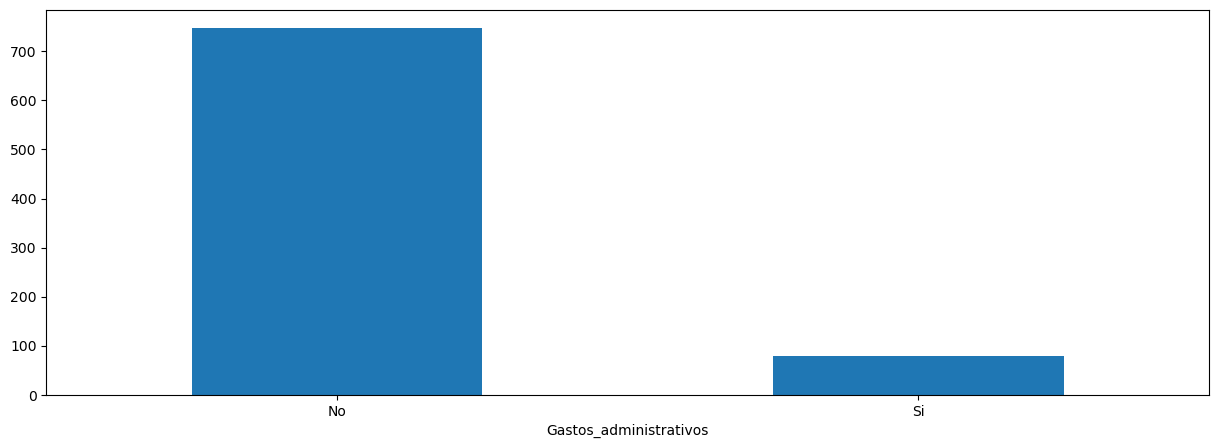

In [223]:
# Resumen datos categóricos

fig, axes = plt.subplots(figsize=(15,5))


# df_cars_resumen.groupby(['Ciudad']).count()['Precio_revisado_£'].sort_values(ascending=False).plot(ax=axes,kind='bar',fontsize=10)
# df_cars_resumen.groupby(['Transmision']).count()['Precio_revisado_£'].sort_values(ascending=False).plot(ax=axes,kind='bar',rot=360,fontsize=10)
# df_cars_resumen.groupby(['Tipo_combustible']).count()['Precio_revisado_£'].sort_values(ascending=False).plot(ax=axes,kind='bar',rot=360,fontsize=10)
# df_cars_resumen.groupby(['Modelo']).count()['Precio_revisado_£'].sort_values(ascending=False).plot(ax=axes,kind='bar',fontsize=10)
df_cars_resumen.groupby(['Gastos_administrativos']).count()['Precio_revisado_£'].sort_values(ascending=False).plot(ax=axes,kind='bar',rot=360,fontsize=10)

In [224]:
# Cambiar codificación columna Gastos_administrativos
df_cars_resumen['Gastos_administrativos'] = np.where(df_cars_resumen['Gastos_administrativos'] == 'Si', 1, 0).astype('int64')
df_cars_resumen

,Ciudad,Kilometraje_millas,Año,Transmision,Tipo_combustible,Modelo,Gastos_administrativos,Precio_revisado_£
0,Bradford,44872,2014,Manual,Petrol,Corsa,0,4995
1,Watford,63200,2015,Manual,Petrol,Astra,0,5250
2,Portsmouth,76153,2017,Manual,Petrol,Corsa,0,5490
3,Exeter,80833,2017,Manual,Petrol,Corsa,0,5495
4,Darlington,38667,2014,Manual,Petrol,ADAM,0,5500
...,...,...,...,...,...,...,...,...
822,Oxford,10,2024,Automatic,Electric,Astra Electric,0,29499
823,Hull,7127,2023,Automatic,Hybrid,Grandland,1,29998
824,Hull,7083,2023,Automatic,Hybrid,Grandland,1,29998
825,Reading,38,2024,Automatic,Hybrid,Grandland,0,30000


In [225]:
# Convertir el tipo de los datos que son objetos a categóricos.

list_col_category = []

for col in df_cars_resumen.columns:
    if df_cars_resumen[col].dtypes == object:
        df_cars_resumen[col] = df_cars_resumen[col].astype('category')
    else:
        list_col_category.append(col)
        
        
df_cars_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Ciudad                  827 non-null    category
 1   Kilometraje_millas      827 non-null    int64   
 2   Año                     827 non-null    int64   
 3   Transmision             827 non-null    category
 4   Tipo_combustible        827 non-null    category
 5   Modelo                  827 non-null    category
 6   Gastos_administrativos  827 non-null    int64   
 7   Precio_revisado_£       827 non-null    int64   
dtypes: category(4), int64(4)
memory usage: 31.6 KB


Mediante el codificador OneHotEncoder, convertimos las variables categóricas.

Con un for recorremos las columnas de un nuevo dataframe (df_cars_category) y aplicamos la codificación para todas las columnas de tipo "category", añadimos las columnas al dataframe df_cars_category y eliminamos las columnas originales.

In [226]:

codificador = OneHotEncoder()

df_cars_category = pd.DataFrame(df_cars_resumen.drop(columns = list_col_category))


for col in df_cars_category.columns:
    codificacion = codificador.fit_transform(df_cars_category[[col]])
    new_cols = pd.DataFrame(codificacion.toarray(), columns = codificador.categories_)
    df_cars_category = pd.concat([df_cars_category, new_cols], axis = 1)
    df_cars_category.drop(columns=[col], axis = 1, inplace=True)
    
          
df_cars_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Birmingham,)                     827 non-null    float64
 1   (Blackburn,)                      827 non-null    float64
 2   (Bradford,)                       827 non-null    float64
 3   (Chester,)                        827 non-null    float64
 4   (Cleveland,)                      827 non-null    float64
 5   (Darlington,)                     827 non-null    float64
 6   (Doncaster,)                      827 non-null    float64
 7   (Durham,)                         827 non-null    float64
 8   (Exeter,)                         827 non-null    float64
 9   (Guilford,)                       827 non-null    float64
 10  (Halifax,)                        827 non-null    float64
 11  (Harrogate,)                      827 non-null    float64
 12  (Hemel,)

In [227]:
# Limpiar nombre columnas. Extraer primer elemento

list_col_df_category = df_cars_category.columns.tolist()

list_col_df_category_clean = [n[0] for n in list_col_df_category]

In [228]:
df_cars_category.columns = list_col_df_category_clean

df_cars_encoded = pd.concat([df_cars_category, df_cars_resumen['Kilometraje_millas'], df_cars_resumen['Año'], 
                             df_cars_resumen['Gastos_administrativos'], df_cars_resumen['Precio_revisado_£']], axis = 1)

# 9. Almacenamiento de los datos

In [229]:
# Se guardan los datos en formato .csv en una carpeta con el nombre del fabricante.

carpeta = nombre_fabricante
os.makedirs(carpeta, exist_ok=True)

In [230]:
df_nombre = 'df_cars_encoded' + '_' + nombre_fabricante + '.csv'

df_cars_encoded.to_csv(carpeta + '/' + df_nombre, index=False)

In [231]:
df_cars_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Birmingham                     827 non-null    float64
 1   Blackburn                      827 non-null    float64
 2   Bradford                       827 non-null    float64
 3   Chester                        827 non-null    float64
 4   Cleveland                      827 non-null    float64
 5   Darlington                     827 non-null    float64
 6   Doncaster                      827 non-null    float64
 7   Durham                         827 non-null    float64
 8   Exeter                         827 non-null    float64
 9   Guilford                       827 non-null    float64
 10  Halifax                        827 non-null    float64
 11  Harrogate                      827 non-null    float64
 12  Hemel                          827 non-null    flo